#CHECK: changed path/dataset in code from ECMWF_ENS_00Z_20201231.nc (couldn't find) to ECMWF_HRES_12Z_20201231.nc (in directory), is this the correct file ?

# Overview of the ECMWF Solar Dataset and Curation Process

*Introduction: The ECMWF Solar dataset provides valuable insights into surface solar radiation measurements gathered from an extensive array of sensors. In this Jupyter notebook, we explore a subset of the ECMWF solar dataset focusing on the key variable related to solar radiance.

*Dataset Description: The curated subset of the ECMWF dataset includes the following variable:

Surface Solar Radiation Downward (SSRD): a pivotal parameter for understanding solar energy distribution and climate dynamics.
SSRD represents the amount of solar radiation reaching the Earth's surface and serves as a crucial indicator for various applications ranging from renewable energy assessment to agricultural planning.

*Curation Process:

The dataset 'ECMWF_HRES_12Z_20201231.nc' was utilized for this analysis. The data was read and processed using the netCDF4 library, facilitating efficient handling of NetCDF files. Relevant variables were selected based on their importance in energy forecasting tasks, and a curated subset was extracted for visualization and analysis within this Jupyter notebook.

*Note on Data Packing:

Please note that when reading NetCDF files using netCDF4 llibrary, it should deal with "scale_factor" and "add_offset" automatically, making unpacking completely transparent to the user. This means that the user always sees the unpacked data values and doesn't have to deal with "scale_factor" and "add_offset" directly. You can find more informations here: https://confluence.ecmwf.int/display/CKB/What+are+NetCDF+files+and+how+can+I+read+them#WhatareNetCDFfilesandhowcanIreadthem-%22scale_factor%22and%22add_offset%22

*Conclusion: The curated subset of the ECMWF Solar dataset provides valuable insights into surface solar radiation to energy forecasting applications. By examining ssrd, we gain a better understanding of the atmospheric dynamics that influence energy generation and consumption patterns.



In [1]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Functions

## Dataset Informations

In [6]:
def print_info(dataset):
    # Print dimensions
    print("Dimensions:")
    for dimname, dimobj in dataset.dimensions.items():
        print(f"  {dimname}: {len(dimobj)}")

    # Print variables and their shapes
    print("\nVariables:")
    for varname, varobj in dataset.variables.items():
        print(f"  {varname}: {varobj.shape}")

    # Print global attributes
    print("\nGlobal Attributes:")
    for attrname in dataset.ncattrs():
        print(f"  {attrname}: {getattr(dataset, attrname)}")

In [7]:
dataset = nc.Dataset("../files/ECMWF_HRES_12Z_20201231.nc")
print_info(dataset)

Dimensions:
  longitude: 325
  latitude: 85
  time: 91

Variables:
  longitude: (325,)
  latitude: (85,)
  time: (91,)
  fdir: (91, 85, 325)
  sp: (91, 85, 325)
  tcwv: (91, 85, 325)
  u10: (91, 85, 325)
  v10: (91, 85, 325)
  t2m: (91, 85, 325)
  d2m: (91, 85, 325)
  ssrd: (91, 85, 325)
  strd: (91, 85, 325)
  lcc: (91, 85, 325)
  tco3: (91, 85, 325)
  tisr: (91, 85, 325)
  tp: (91, 85, 325)
  fal: (91, 85, 325)

Global Attributes:
  Conventions: CF-1.6
  history: 2021-06-27 05:50:11 GMT by grib_to_netcdf-2.22.0: grib_to_netcdf /data/scratch/20210627-0540/40/_mars-webmars-private-svc-green-011-6fe5cac1a363ec1525f54343b6cc9fd8-EsONns.grib -o /data/scratch/20210627-0550/57/_grib2netcdf-webmars-private-svc-green-011-6fe5cac1a363ec1525f54343b6cc9fd8-I4wSFd.nc -utime


## Variable Description

In [8]:
def describe_variable(dataset, variable_name):
    """
    Compute basic statistics for a variable in a NetCDF dataset.
    """
    variable = dataset.variables[variable_name][:]
    
    statistics = {
        'min': np.min(variable) ,
        'max': np.max(variable),
        'mean': np.mean(variable),
        'std_dev': np.std(variable)
    }

    return statistics

## Plot of Variable Description

In [9]:
def plot_statistics(statistics):
    """
    Plot the statistics computed.
    """
    plt.figure(figsize=(8, 6))
    plt.bar(statistics.keys(), statistics.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Statistics')
    plt.ylabel('Values')
    plt.title(f'Statistics for Variable {variable_name}')
    plt.show()


## Missing Values

In [10]:
def print_missing_values(dataset):
    """
    Print the count of missing values for each variable in the NetCDF dataset.
    """
    for varname, varobj in dataset.variables.items():
        missing_values_count = np.count_nonzero(np.isnan(varobj[:]))
        print(f"Variable: {varname}, Missing Values Count: {missing_values_count}")

# Surface solar Radiation

## Statistics

In [11]:
variable_name = 'ssrd'  
statistics = describe_variable(dataset, variable_name)
print(statistics)

{'min': 0.0, 'max': 78080537.4375, 'mean': 12839379.599587215, 'std_dev': 13252074.602225913}


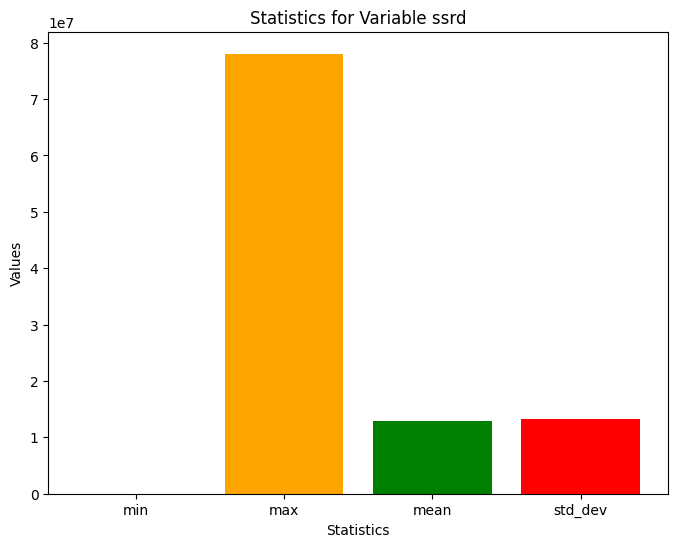

In [12]:
plot_statistics(statistics)

## Distribution

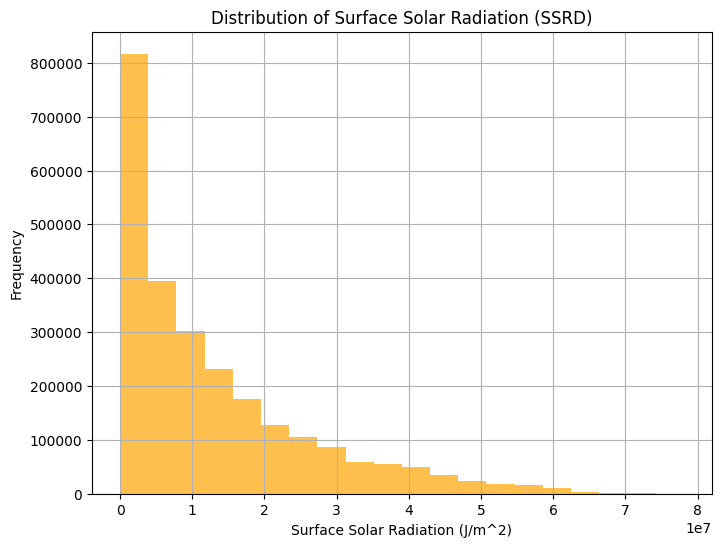

In [13]:
ssrd = dataset.variables['ssrd'][:]
time = dataset.variables['time'][:]
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]
plt.figure(figsize=(8, 6))
plt.hist(ssrd.flatten(), bins=20, color='orange', alpha=0.7)
plt.xlabel('Surface Solar Radiation (J/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Surface Solar Radiation (SSRD)')
plt.grid(True)
plt.show()

## Variation over Time

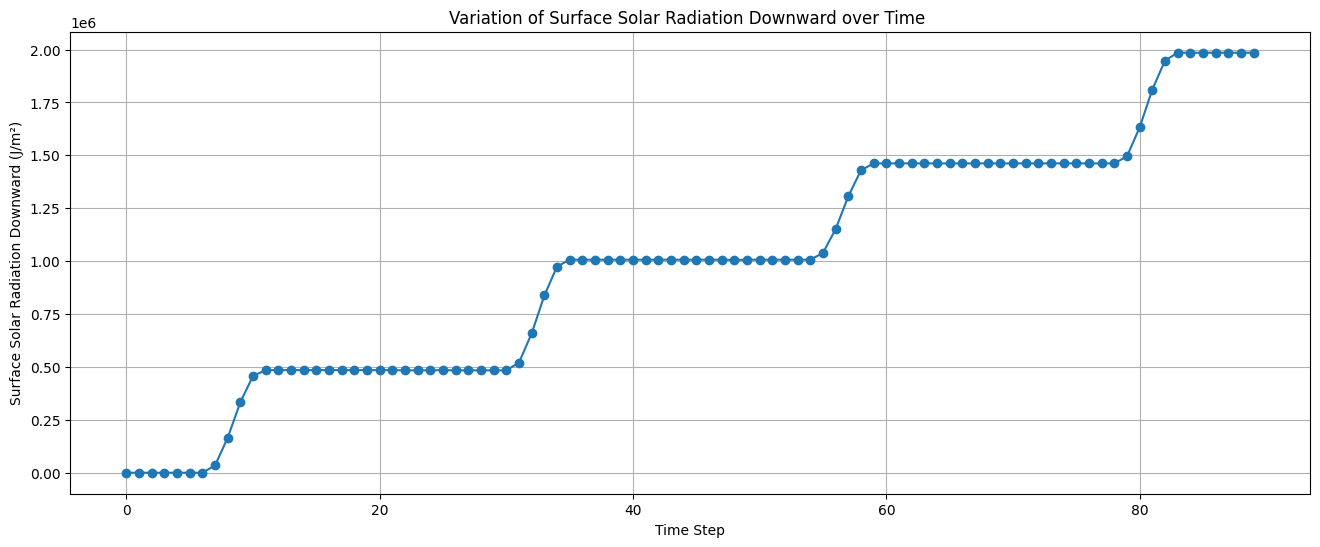

In [22]:
start_time_step = 0
end_time_step = 90  # Adjust as needed

# Plot the values of SSRD across the selected time steps
plt.figure(figsize=(16, 6))
plt.plot(range(start_time_step, end_time_step), ssrd[start_time_step:end_time_step, 0, 0], marker='o', linestyle='-')
plt.xlabel('Time Step')
plt.ylabel('Surface Solar Radiation Downward (J/m²)')
plt.title('Variation of Surface Solar Radiation Downward over Time ')
plt.grid(True)
plt.show()

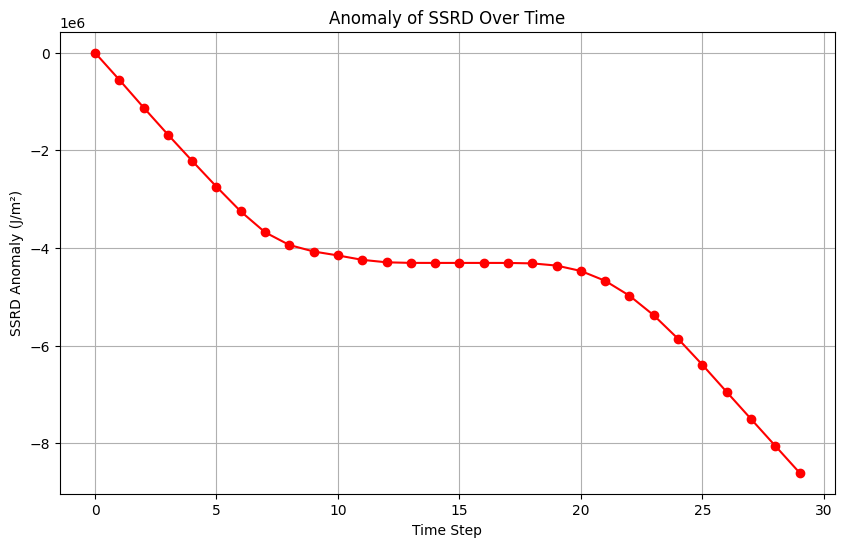

In [15]:
start_time_step = 0
end_time_step = 30  # Adjust as needed
ssrd_subset = ssrd[start_time_step:end_time_step, :, :]
ssrd_mean_subset = np.mean(ssrd_subset, axis=(1, 2))
ssrd_anomaly_subset = ssrd_subset - ssrd_mean_subset[:, np.newaxis, np.newaxis]
plt.figure(figsize=(10, 6))
plt.plot(range(start_time_step, end_time_step), ssrd_anomaly_subset[:, 0, 0], color='red', marker='o', linestyle='-')
plt.xlabel('Time Step')
plt.ylabel('SSRD Anomaly (J/m²)')
plt.title('Anomaly of SSRD Over Time')
plt.grid(True)
plt.show()

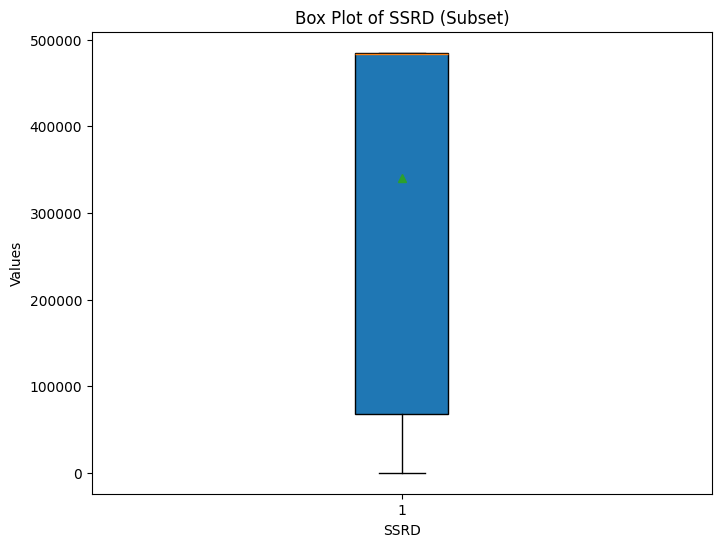

In [16]:
start_time_step = 0
end_time_step = 30  # Adjust as needed
ssrd_subset = ssrd[start_time_step:end_time_step, :, :]
ssrd_reshaped = ssrd_subset.reshape(-1, ssrd_subset.shape[-2], ssrd_subset.shape[-1])
plt.figure(figsize=(8, 6))
plt.boxplot(ssrd_reshaped[:, 0, 0], patch_artist=True, showmeans=True)
plt.xlabel('SSRD')
plt.ylabel('Values')
plt.title('Box Plot of SSRD (Subset)')
plt.show()

## Kernel Density Estimation

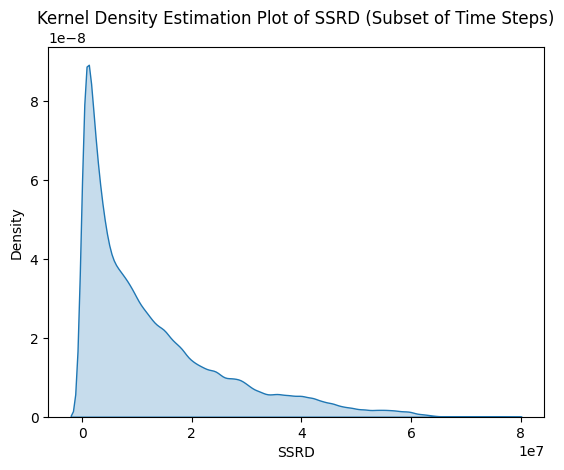

In [23]:
ssrd = dataset.variables['ssrd'][:]
# Select a subset of time steps (adjust as needed)
subset_time_steps = slice(0, 50)  # Example: select the first 50 time steps
ssrd_subset = ssrd[subset_time_steps].flatten()
sns.kdeplot(ssrd_subset, fill=True)
plt.xlabel('SSRD')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of SSRD (Subset of Time Steps)')
plt.show()

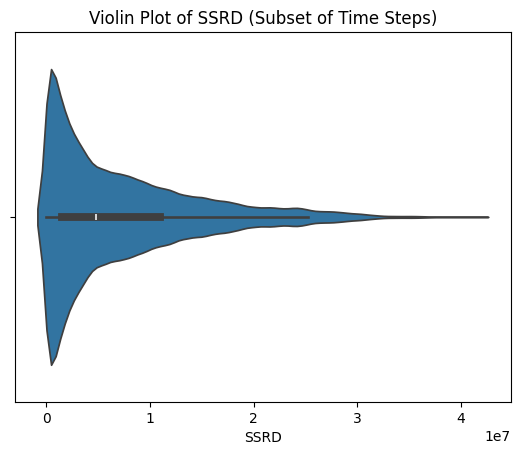

In [24]:
ssrd = dataset.variables['ssrd'][:]
# Select a subset of time steps (adjust as needed)
subset_time_steps = slice(0, 50)  
ssrd_subset = ssrd[subset_time_steps].flatten()
sns.violinplot(ssrd_subset, orient='h')
plt.xlabel('SSRD')
plt.title('Violin Plot of SSRD (Subset of Time Steps)')
plt.show()

# Missing Values

In [25]:
print_missing_values(dataset)

Variable: longitude, Missing Values Count: 0
Variable: latitude, Missing Values Count: 0
Variable: time, Missing Values Count: 0
Variable: fdir, Missing Values Count: 0
Variable: sp, Missing Values Count: 0
Variable: tcwv, Missing Values Count: 0
Variable: u10, Missing Values Count: 0
Variable: v10, Missing Values Count: 0
Variable: t2m, Missing Values Count: 0
Variable: d2m, Missing Values Count: 0
Variable: ssrd, Missing Values Count: 0
Variable: strd, Missing Values Count: 0
Variable: lcc, Missing Values Count: 0
Variable: tco3, Missing Values Count: 0
Variable: tisr, Missing Values Count: 0
Variable: tp, Missing Values Count: 0
Variable: fal, Missing Values Count: 0
